In [16]:
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
vds = pd.read_csv('최종 하행데이터.csv',encoding='euc-kr')

In [3]:
ex = vds[vds.VDS_ID == '0010VDS25450']

In [4]:
#각 vds별로 시간순 나열 
ex['date'] = pd.date_range(start='2020-08-13', \
                           end='2020-08-26 23:45:00', freq='15min')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
y=ex[['date','평균속도']]

In [6]:
y=y.set_index('date')

In [7]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(2,0,2),
                               seasonal_order=(0,0,0,96))

results = mod.fit()

print(results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                   평균속도   No. Observations:                 1344
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -4079.166
Date:                Mon, 07 Sep 2020   AIC                           8168.332
Time:                        17:02:50   BIC                           8194.349
Sample:                    08-13-2020   HQIC                          8178.077
                         - 08-26-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2035      0.030      6.839      0.000       0.145       0.262
ar.L2          0.7953      0.029     27.171      0.000       0.738       0.853
ma.L1          0.5311      0.031     17.014      0.0

In [8]:
preds = results.predict(1)
print(preds)

2020-08-13 00:15:00    97.711377
2020-08-13 00:30:00    95.763740
2020-08-13 00:45:00    93.306533
2020-08-13 01:00:00    94.730198
2020-08-13 01:15:00    95.457821
                         ...    
2020-08-26 22:45:00    87.579822
2020-08-26 23:00:00    88.589521
2020-08-26 23:15:00    89.108990
2020-08-26 23:30:00    89.176576
2020-08-26 23:45:00    90.011751
Freq: 15T, Length: 1343, dtype: float64


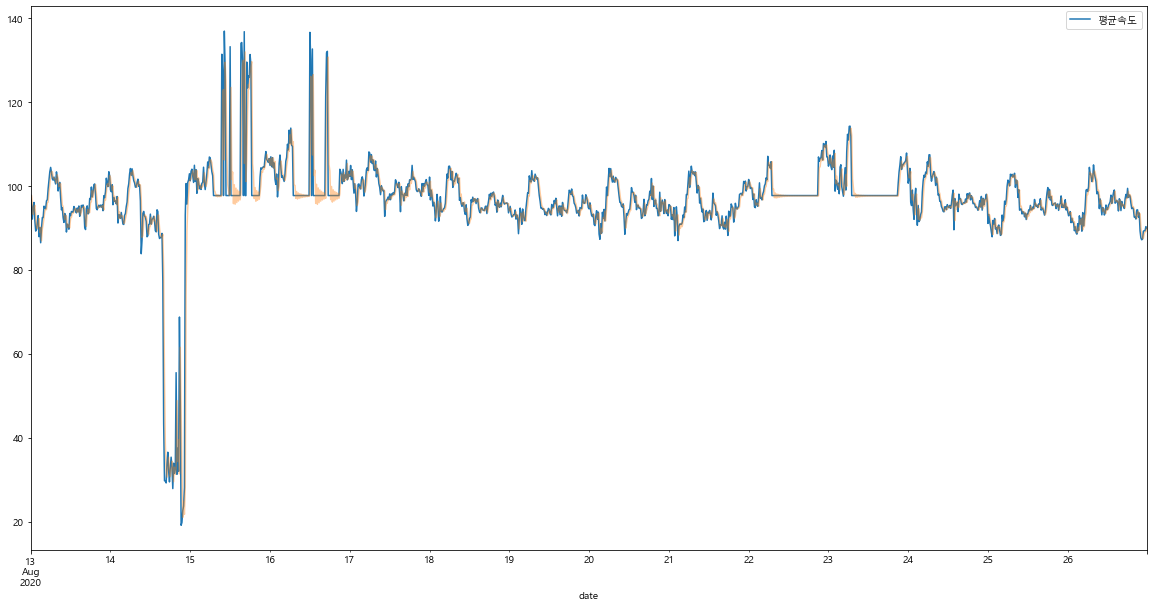

In [9]:
series = y
series.plot(figsize=(20,10))
preds.plot(alpha=0.4);

In [12]:
print('MSE :', mean_squared_error(y['평균속도'][1:], results.predict(1)[:]))

MSE : 25.22432107897517


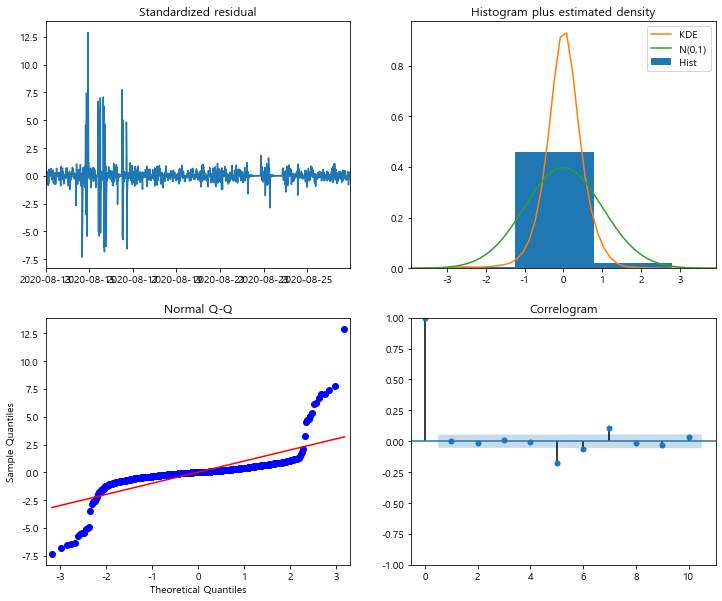

In [17]:
results.plot_diagnostics( figsize=(12, 10) )
plt.show()